# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 4

In [2]:
df = pd.read_csv('4_debt_to_income_ratio_and_applicant_age.csv', low_memory=False)

In [3]:
# Print the value counts for the filtered DataFrame
print("Value counts for applicant_race_1 after filtering:")
print(df['applicant_race_1'].value_counts())
print(df['co_applicant_race_1'].value_counts())

print("Value counts for applicant_ethnicity_1 after filtering:")
print(df['applicant_ethnicity_1'].value_counts())
print(df['co_applicant_ethnicity_1'].value_counts())

Value counts for applicant_race_1 after filtering:
applicant_race_1
5.0    59522
3.0     3410
Name: count, dtype: int64
co_applicant_race_1
5.0    59503
3.0     3429
Name: count, dtype: int64
Value counts for applicant_ethnicity_1 after filtering:
applicant_ethnicity_1
2.0    56532
1.0     6400
Name: count, dtype: int64
co_applicant_ethnicity_1
2.0    56346
1.0     6586
Name: count, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62932 entries, 0 to 62931
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   action_taken                              62932 non-null  int64  
 1   loan_type                                 62932 non-null  int64  
 2   lien_status                               62932 non-null  int64  
 3   open_end_line_of_credit                   62932 non-null  int64  
 4   loan_amount                               62932 non-null  int64  
 5   combined_loan_to_value_ratio              61760 non-null  object 
 6   interest_rate                             36829 non-null  object 
 7   total_loan_costs                          36829 non-null  object 
 8   origination_charges                       36829 non-null  object 
 9   loan_term                                 62884 non-null  object 
 10  negative_amortization             

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['combined_loan_to_value_ratio',
 'interest_rate',
 'total_loan_costs',
 'origination_charges',
 'loan_term',
 'property_value',
 'total_units',
 'debt_to_income_ratio']

In [6]:

interest_rate_counts = df['interest_rate'].value_counts().reset_index()
interest_rate_counts.columns = ['interest_rate', 'count']

# This will give you a DataFrame with two columns: 'interest_rate' and 'count'.
print(interest_rate_counts)

# Display the top N values, e.g., top 10
top_N = 10
top_interest_rates = interest_rate_counts.head(top_N)

# This will give you a DataFrame with the top N interest rates and their counts.
print(top_interest_rates)

    interest_rate  count
0           3.875   4060
1            3.75   2863
2           3.625   2791
3             4.0   2661
4           4.125   2643
..            ...    ...
135          3.69      1
136         3.075      1
137          2.33      1
138          2.59      1
139          3.85      1

[140 rows x 2 columns]
  interest_rate  count
0         3.875   4060
1          3.75   2863
2         3.625   2791
3           4.0   2661
4         4.125   2643
5           3.5   2476
6         4.375   2085
7         3.375   1939
8           4.5   1618
9          4.25   1574


In [7]:
# Assuming interest_rate_counts is the DataFrame with interest rates and their counts
interest_rate_values_less_than_10 = interest_rate_counts[interest_rate_counts['count'] < 100]

# This will give you a DataFrame with the interest rates that have less than 10 entries.
print(interest_rate_values_less_than_10)

    interest_rate  count
32           5.75     92
33           2.99     91
34          4.865     63
35          2.375     57
36          6.125     57
..            ...    ...
135          3.69      1
136         3.075      1
137          2.33      1
138          2.59      1
139          3.85      1

[108 rows x 2 columns]


In [8]:
# First, convert the 'interest_rate' column to numeric (float)
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['interest_rate'].min()
maximum_interest_rate = df['interest_rate'].max()
median_interest_rate = df['interest_rate'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 12.25
Median Interest Rate: 3.875


## Number of entries with a minimum interest rate

In [9]:
count_zero_interest_rate = len(df[df['interest_rate'] == 0.0])
print("Number of entries with a minimum interest rate of 0.0:", count_zero_interest_rate)

Number of entries with a minimum interest rate of 0.0: 3


In [10]:
# Filter the DataFrame to select only rows with a minimum interest rate of 0.0
zero_interest_rate_entries = df[df['interest_rate'] == 0.0]

# Count the occurrences of each 'action_taken' category
action_taken_counts = zero_interest_rate_entries['action_taken'].value_counts()

# Print the counts for each 'action_taken' category
print("Count of each 'action_taken' category for entries with a minimum interest rate of 0.0:")
print(action_taken_counts)


Count of each 'action_taken' category for entries with a minimum interest rate of 0.0:
action_taken
1    3
Name: count, dtype: int64


- 1 - Loan originated
- 2 - Application approved but not accepted
- 3 - Application denied
- 4 - Application withdrawn by applicant
- 5 - File closed for incompleteness
- 6 - Purchased loan
- 7 - Preapproval request denied
- 8 - Preapproval request approved but not accepted

## Number of entries with a maximum interest rate

In [11]:
# Find the maximum interest rate in the DataFrame
max_interest_rate = df['interest_rate'].max()

# Filter the DataFrame to select only rows with the maximum interest rate
max_interest_rate_entries = df[df['interest_rate'] == max_interest_rate]

# Count the number of entries with the maximum interest rate
count_max_interest_rate = len(max_interest_rate_entries)

print("Number of entries with the maximum interest rate:", count_max_interest_rate)


Number of entries with the maximum interest rate: 1


In [12]:
# Find the maximum interest rate in the DataFrame
max_interest_rate = df['interest_rate'].max()

# Filter the DataFrame to select only rows with the maximum interest rate
max_interest_rate_entries = df[df['interest_rate'] == max_interest_rate]

# Get the unique values in the 'action_taken' column for these filtered entries
unique_action_taken_values = max_interest_rate_entries['action_taken'].unique()

# Print the unique 'action_taken' values for entries with the maximum interest rate
print("Unique 'action_taken' values for entries with the maximum interest rate:")
print(unique_action_taken_values)


Unique 'action_taken' values for entries with the maximum interest rate:
[1]


## Interquartile Range (IQR) for 'interest_rate'

In [13]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'interest_rate'
Q1 = df['interest_rate'].quantile(0.25)
Q3 = df['interest_rate'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for 'interest_rate' across all rows:", IQR)

Interquartile Range (IQR) for 'interest_rate' across all rows: 0.75


## first quartile (Q1) and third quartile (Q3): 50% of the data falls within this range

In [14]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'interest_rate'
Q1 = df['interest_rate'].quantile(0.25)
Q3 = df['interest_rate'].quantile(0.75)

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)


First Quartile (Q1): 3.625
Third Quartile (Q3): 4.375


## the range that contains 90% of the data: 5th percentile (Q5) and the 95th percentile (Q95)

In [15]:
# Calculate the 5th percentile (Q5) and 95th percentile (Q95) for 'interest_rate'
Q5 = df['interest_rate'].quantile(0.05)
Q95 = df['interest_rate'].quantile(0.95)

print("5th Percentile (Q5):", Q5)
print("95th Percentile (Q95):", Q95)

# Calculate the range for 90% of the data
data_range_90_percent = Q95 - Q5

print("Range for 90% of the data:", data_range_90_percent)

5th Percentile (Q5): 3.0
95th Percentile (Q95): 5.0
Range for 90% of the data: 2.0


# Conclusion

90% of the interest rates are between 3% and 5.25%

50% of the interest rates are between 3.75 and 4.5%

# Make new categories

In [16]:
## fill nan values with mode first.
mode_value = df['interest_rate'].mode().values[0]
df['interest_rate'].fillna(mode_value, inplace=True)

In [17]:
'''
Minimum Interest Rate: 0.0
Maximum Interest Rate: 11.0
Median Interest Rate: 3.99
'''

# Define a function to categorize interest rates into the desired ranges
def categorize_interest_rate(rate):
    if rate >= 0.0 and rate <= 1.0:
        return '0.0-1.0'
    elif rate > 1.0 and rate <= 2.0:
        return '1.0-2.0'
    elif rate > 2.0 and rate <= 3.0:
        return '2.0-3.0'
    elif rate > 3.0 and rate <= 3.5:
        return '3.0-3.5'
    elif rate > 3.5 and rate <= 4.0:
        return '3.5-4.0'
    elif rate > 4.0 and rate <= 4.5:
        return '4.0-4.5'
    elif rate > 4.5 and rate <= 5.0:
        return '4.5-5.0'
    elif rate > 5.0 and rate <= 6.0:
        return '5.0-6.0'
    elif rate > 6.0 and rate <= 7.0:
        return '6.0-7.0'
    elif rate > 7.0 and rate <= 8.0:
        return '7.0-8.0'
    elif rate > 8.0 and rate <= 9.9:
        return '8.0-9.0'
    elif rate > 9.9 and rate <= 25.0:
        return '9.9-15.0'
    else:
        return 'Other'

# Apply the categorization function to 'interest_rate' column
df['interest_rate'] = df['interest_rate'].apply(categorize_interest_rate)

# Print the result
print(df['interest_rate'].value_counts())


interest_rate
3.5-4.0     40625
4.0-4.5      8243
3.0-3.5      7101
4.5-5.0      3380
2.0-3.0      1872
5.0-6.0      1488
6.0-7.0       184
7.0-8.0        15
8.0-9.0        13
9.9-15.0        5
0.0-1.0         3
1.0-2.0         3
Name: count, dtype: int64


In [18]:
# Filter the DataFrame to show 'interest_rate' values in the 'Other' category
other_interest_rates = df[df['interest_rate'] == 'Other']

# Print the unique interest rates in the 'Other' category
unique_other_interest_rates = other_interest_rates['interest_rate'].unique()

print("Unique Interest Rates in 'Other' Category:")
print(unique_other_interest_rates)


Unique Interest Rates in 'Other' Category:
[]


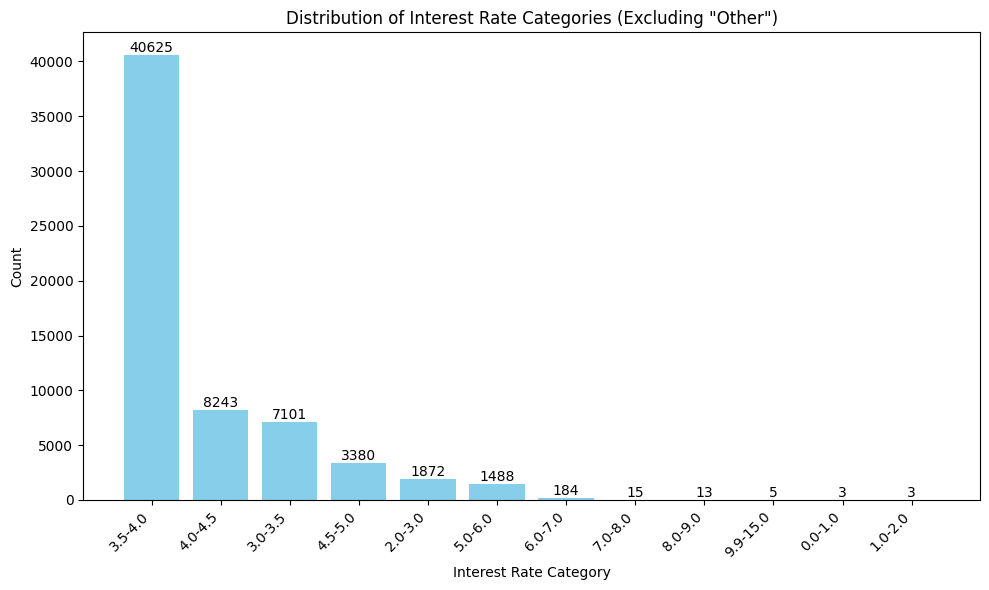

In [19]:
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude the 'Other' category
filtered_df = df[df['interest_rate'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['interest_rate'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [20]:
print(df['interest_rate'].value_counts())

interest_rate
3.5-4.0     40625
4.0-4.5      8243
3.0-3.5      7101
4.5-5.0      3380
2.0-3.0      1872
5.0-6.0      1488
6.0-7.0       184
7.0-8.0        15
8.0-9.0        13
9.9-15.0        5
0.0-1.0         3
1.0-2.0         3
Name: count, dtype: int64


In [21]:
df.to_csv('5_interest_rate.csv', index=False)